# Day 2 – Classification Basics with Logistic Regression

In this notebook, I build a complete classification pipeline using synthetic data and Logistic Regression:
- Generate a 2D dataset with two classes
- Split into train/test sets
- Train a Logistic Regression classifier
- Evaluate with accuracy, precision, recall and F1-score
- Plot the decision boundary


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)

# Make plots appear inline
%matplotlib inline


In [2]:
# Generate a 2D binary classification dataset
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.5,
    random_state=42,
)

X[:5], y[:10]


(array([[ 1.50845498, -1.54700975],
        [ 0.82602138,  1.00254097],
        [ 1.52420498, -2.29714286],
        [ 0.62188007,  0.55937142],
        [ 0.53909973,  0.88236937]]),
 array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1]))

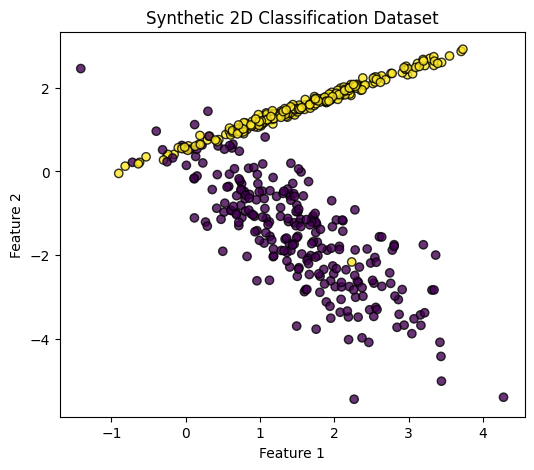

In [3]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", alpha=0.8)
plt.title("Synthetic 2D Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y,
)

X_train.shape, X_test.shape


((375, 2), (125, 2))

In [5]:
# Create and train the logistic regression classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

clf


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [6]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Compute classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

accuracy, precision, recall, f1, cm


(0.976,
 0.9545454545454546,
 1.0,
 0.9767441860465116,
 array([[59,  3],
        [ 0, 63]]))

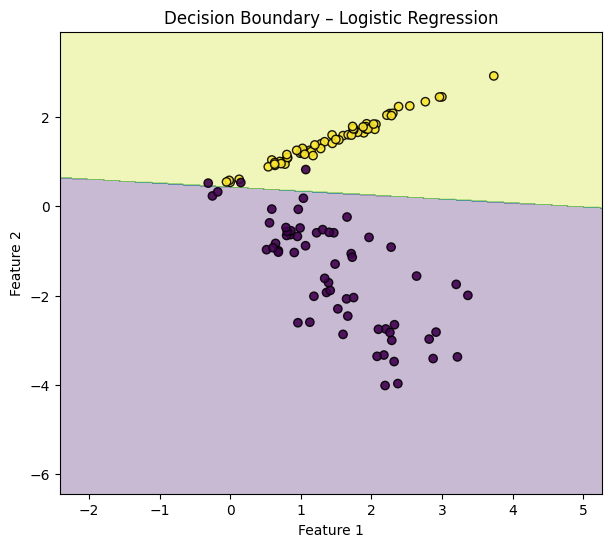

In [7]:
# Plot decision boundary and test points
h = 0.02  # step size in the mesh

# Define grid limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h),
)

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(grid_points)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k", alpha=0.9)
plt.title("Decision Boundary – Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
